## Rotações em 3D

Para a computação gráfica, o espaço de rotações tem grande importância pois lida, entre outras coisas, com orientação e posicionamento. Logo, encontrar boas formas de representar e parametrizar esse espaço é essencial para uma implementação mais eficiente.

In [1]:
from sympy import *
from scripts import plot

#### Ângulos de Euler, $R_x$, $R_y$, $R_z$

Considere a base canônica $E = \{e_1, e_2, e_3\} \in \mathbb{R}^3$. Esse referencial define as coordenadas cartesianas do espaço. Temos em particular as rotações $R(x,\varphi)$, $R(y,\vartheta)$ e $R(z,\psi)$
por ângulos $\varphi$, $\vartheta$ e $\psi$ em torno dos eixos $x$, $y$, e $z$ respetivamente.
As matrizes destas rotações são:

$
R(x,\varphi)=\begin{pmatrix} 1 & 0 & 0 \\ 0 & \cos\varphi & -\sin\varphi \\ 0 & \sin\varphi & \cos\varphi\end{pmatrix}\\
R(y,\vartheta)=\begin{pmatrix} \cos\vartheta & 0 & \sin\vartheta \\ 0 & 1 & 0 \\  -\sin\vartheta & 0 & \cos\vartheta\end{pmatrix}\\
R(z,\psi)=\begin{pmatrix} \cos\psi & -\sin\psi  & 0 \\ \sin\psi & \cos\psi & 0 \\ 0 & 0 & 1\end{pmatrix}
$


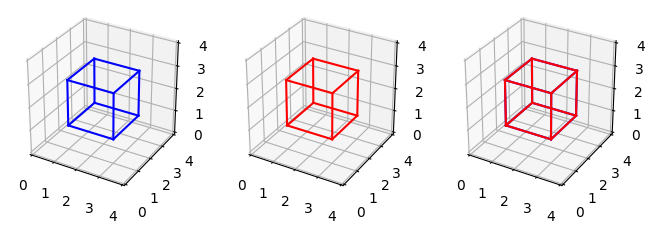

Matriz de rotação: 


Matrix([
[0, -1, 0],
[1,  0, 0],
[0,  0, 1]])

In [2]:
Matrix([[pi/2, 0], [0, pi/2]])
angle = rad(90)

# rotation matrix z-axis
rotation_matrix = Matrix([
    [cos(angle), -sin(angle), 0],
    [sin(angle),  cos(angle), 0],
    [0         ,  0         , 1]
])

# rotation matrix y-axis
rotation_matrix_2 = Matrix([
    [cos(angle),  0, sin(angle)],
    [0,           1, 0],
    [-sin(angle), 0, cos(angle)]
])

# plot
plot.cube_with_rotation(rotation_matrix)

print("Matriz de rotação: ")
rotation_matrix


#### Decomposição $XYZ$

**Afirmação:** *"Uma rotação $R$ em $SO(3)$ pode ser obtida por meio de três rotações consecutivas em torno dos eixos da base."*

<details>
<summary>Demonstração:</summary>

Instructions go here

</details>


--

Podemos descrever uma rotação da forma $XYZ$ por ângulos de Euler $R(z,\psi)R(y,\vartheta)R(x,\varphi)$ pela matriz seguinte, que vêm simplesmente da multiplicação das matrizes de rotação por cada eixo.

$
\begin{pmatrix}
    \cos\vartheta\cos\psi & -\cos\varphi\sin\psi+\sin\varphi\sin\vartheta\cos \psi & \sin\varphi\sin\psi+
    \cos\varphi\sin\vartheta\cos\psi\\
    \cos\vartheta\sin\psi & \cos\varphi\cos\psi+\sin\varphi\sin\vartheta\sin \psi &
    -\sin\varphi\cos\psi+
    \cos\varphi\sin\vartheta\sin\psi\\
    -\sin\vartheta & \sin\varphi\cos\vartheta & \cos\varphi\cos\vartheta
\end{pmatrix}
$

Tendo a matriz geral, podemos a analisar e recuperar os angulos de Euler para cada respectiva rotação em XYZ. Uma forma para obter $\psi$, $\vartheta$ e $ \varphi$ é realizar operações de arco tangente com as entradas da matriz.

**Gimbal lock:** Um dos problemas inerentes dessa parametrização é a criação de singularidades, isto é regiões do domínio da parametrização na qual não temos os três graus de liberdade na matriz de rotação. Podemos explicitar uma singularidade da seguinte forma: imagine quando $cos(\vartheta)$ é zero, isso acontece quando $\vartheta = \pm \frac{\pi}{2}$. A matriz de rotação terá uma das seguintes formas:

$
sin(\vartheta)=1 \\
\begin{pmatrix}
 0  & sin(\varphi - \psi) &  cos(\varphi - \psi)  \\
 0  & cos(\varphi - \psi) & -sin(\varphi - \psi) \\
-1  & 0                   &  0
\end{pmatrix}
$

$
sin(\vartheta)=-1 \\
\begin{pmatrix}
0 & -sin(\varphi + \psi) & -cos(\varphi + \psi)  \\
0 &  cos(\varphi + \psi) & -sin(\varphi + \psi) \\
1 &  0                   &  0
\end{pmatrix}
$

Nesses casos perdemos um grau de liberdade, já que a matriz parametrizada só depende da diferença/adição dos dois ângulos restantes. Tudo que podemos dizer da matriz é o valor $\varphi \pm \psi$. Uma solução possível para recuperar um dos valores é definir o outro arbitrariamente, assim teremos uma das possíveis soluções para definir a rotação.

In [30]:
# XYZ decomposition with singularities check
# if not checked, for some values angles can be _NaN_

rotation = rotation_matrix_2

if (Abs(rotation[2, 0]) == 1):
    theta_xyz = asin(-rotation[2, 0])
    phi_xyz   = atan2(Abs(rotation[0, 1]), Abs(rotation[0, 2]))
    psi_xyz   = 0
else:
    theta_xyz = atan2(rotation[2, 0], sqrt(pow(rotation[2, 1], 2) + pow(rotation[2, 2], 2)))
    phi_xyz   = atan2(rotation[2, 1], rotation[2, 2])
    psi_xyz   = atan2(rotation[1, 0], rotation[0, 0])

print("theta:", theta_xyz, "; phi:", phi_xyz, "; psi:", psi_xyz)
rotation

theta: pi/2 ; phi: 0 ; psi: 0


Matrix([
[ 0, 0, 1],
[ 0, 1, 0],
[-1, 0, 0]])

Com os ângulos $\varphi$, $\vartheta$ e $\psi$, podemos recriar a matriz de rotação substituindo na matriz $XYZ$ informada ou realizando a composição diretamente.

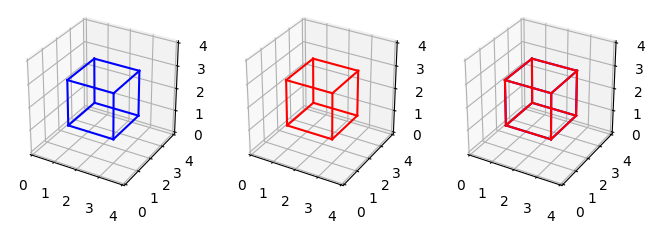

Iguais? True
Matriz de rotação recuperada:


Matrix([
[ 0, 0, 1],
[ 0, 1, 0],
[-1, 0, 0]])

In [31]:
# recreate the matrix
def get_xyz_rotation_matrix(theta, phi, psi):
  xyz_matrix = Matrix([
    [cos(theta) * cos(psi), -cos(phi) * sin(psi) + sin(phi) * sin(theta) * cos(psi),  sin(phi) * sin(psi) + cos(phi) * sin(theta) * cos(psi)],
    [cos(theta) * sin(psi),  cos(phi) * cos(psi) + sin(phi) * sin(theta) * sin(psi), -sin(phi) * cos(psi) + cos(phi) * sin(theta) * sin(psi)],
    [-sin(theta)          ,  sin(phi) * cos(theta)                                 ,  cos(phi) * cos(theta)                                 ]
  ])

  return xyz_matrix

rotation_xyz = get_xyz_rotation_matrix(theta_xyz, phi_xyz, psi_xyz)

plot.cube_with_rotation(rotation_xyz)

print("Iguais?", rotation_matrix_2 == rotation_xyz)
print("Matriz de rotação recuperada:")
rotation_xyz

#### Decomposição $ZXZ$

**Afirmação:** *"Uma rotação $R$ em $SO(3)$ pode ser obtida por meio de três rotações consecutivas em torno de dois eixos sob um mesmo plano."*

<details>
<summary>Demonstração:</summary>

Instructions go here

</details>

--

Podemos descrever uma rotação na forma $ZXZ$ (uma rotação no eixo _x_ e duas no eixo _z_) com ângulos de Euler, $R=R(z,\psi)R(x,\vartheta)R(z,\varphi)$ pela matriz:

$
\begin{pmatrix}
    \cos\psi\cos\varphi - \sin\psi\cos\vartheta\sin\varphi & -\cos\psi\sin\varphi - \sin\psi\cos\vartheta\cos\varphi   &                \sin\psi\sin\vartheta\\
\cos\psi\cos\vartheta\sin\varphi + \sin\psi\cos\varphi & \cos\psi\cos\vartheta\cos\varphi - \sin\psi\sin\varphi    &              -\cos\psi\sin\vartheta\\
\sin\vartheta\sin\varphi &                  \sin\vartheta\cos\varphi      &                  \cos\vartheta
\end{pmatrix}
$

Uma forma para recuperar $\psi$, $\vartheta$ e $ \varphi$ é realizar operações de arco tangente com as entradas da matriz.

**Gimbal lock:** Da mesma forma que na decomposição $XYZ$, temos o problema da singularidade por causa da parametrização. Caso $cos(\vartheta) = \pm 1$ a matriz de rotação terá uma das seguintes formas:

$
cos(\vartheta) =-1 \\
\begin{pmatrix}
cos(\varphi - \psi) &  sin(\varphi - \psi) &  0 \\
sin(\varphi - \psi) & -cos(\varphi - \psi) &  0 \\
0                   &  0                   & -1
\end{pmatrix}
$

$
cos(\vartheta) =1 \\
\begin{pmatrix}
cos(\varphi + \psi) & -sin(\varphi + \psi) & 0 \\
sin(\varphi + \psi) &  cos(\varphi + \psi) & 0 \\
0                   &  0                   & 1
\end{pmatrix}
$

Perdemos um grau de liberdade. Assim como em $XYZ$ discutido anteriormente, uma forma para ainda obter ângulos que especificam a parametrização é de forma arbitrária definir o valor de um deles, já que só levamos em conta sua diferença/soma.

In [28]:
# ZXZ decomposition with singularities check
# if not checked, for some values angles can be _NaN_

rotation = rotation_matrix

if (Abs(rotation[2, 2]) == 1):
    theta_zxz = acos(rotation[2, 2])
    phi_zxz   = atan2(rotation[1, 0], rotation[0, 0])
    psi_zxz   = 0
else:
    theta_zxz = atan2(sqrt(pow(rotation[2, 0], 2) + pow(rotation[2, 1], 2)), rotation[2, 2])
    phi_zxz   = atan2(rotation[2, 0], rotation[2, 1])
    psi_zxz   = atan2(rotation[0, 2], rotation[1, 2])

print("theta:", theta_zxz, "; phi:", phi_zxz, "; psi:", psi_zxz)
rotation

theta: 0 ; phi: pi/2 ; psi: 0


Matrix([
[0, -1, 0],
[1,  0, 0],
[0,  0, 1]])

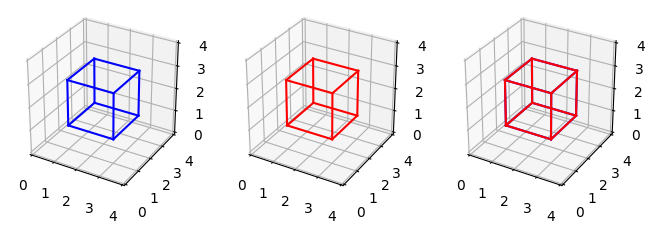

Matriz de rotação: 
iguais?  True


In [29]:
# recreate the matrix
def get_zxz_rotation_matrix(theta, phi, psi):
  zxz_matrix = Matrix([
    [cos(psi) * cos(phi) - sin(psi) * cos(theta) * sin(phi), -cos(psi) * sin(phi) - sin(psi) * cos(theta) * cos(phi),  sin(psi) * sin(theta)],
    [cos(psi) * cos(theta) * sin(phi) + sin(psi) * cos(phi),  cos(psi) * cos(theta) * cos(phi) - sin(psi) * sin(phi), -cos(psi) * sin(theta)],
    [sin(theta) * sin(phi)                                 ,  sin(theta) * cos(phi)                                 ,  cos(theta)           ]
  ])

  return zxz_matrix

rotation_zxz = get_zxz_rotation_matrix(theta_zxz, phi_zxz, psi_zxz)

plot.cube_with_rotation(rotation_zxz)
print("Matriz de rotação: ")
rotation_zxz

print("iguais? ", rotation_matrix == rotation_zxz)

#### Rotação Eixo-Ângulo

Seja $k \in \mathbb{R}^3$ um vetor unitário e um ângulo $\vartheta \in [0, 2\pi)$. Utilizando a fórmula da rotação de Rodrigues, podemos rotacionar um vetor (e consequentemente todos os vetores da base) dado um ângulo e um eixo. 

A matriz da rotação $R=R(k, \vartheta)$ na base canônica é:

$\begin{pmatrix}
    (1-\cos\vartheta)k_x^2+\cos\vartheta & (1-\cos\vartheta)k_xk_y-k_z\sin\vartheta  &
    (1-\cos\vartheta)k_xk_z+k_y\sin\vartheta \\
    (1-\cos\vartheta)k_xk_y+k_z\sin\vartheta  & (1-\cos\vartheta)k_y^2+\cos\vartheta  &
    (1-\cos\vartheta)k_yk_z-k_x\sin\vartheta \\
    (1-\cos\vartheta)k_xk_z-k_y\sin\vartheta & (1-\cos\vartheta)k_yk_z+k_x\sin\vartheta  &
    (1-\cos\vartheta)k_z^2+\cos\vartheta
\end{pmatrix}$

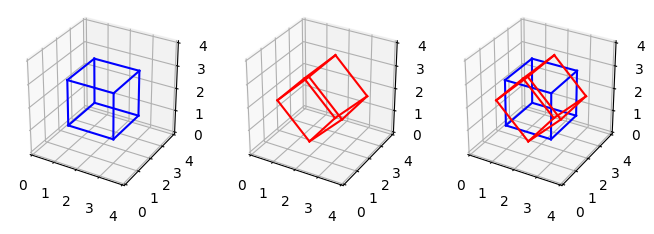

Matriz de rotação: 


Matrix([
[ sqrt(2)/2, 0, sqrt(2)/2],
[         0, 1,         0],
[-sqrt(2)/2, 0, sqrt(2)/2]])

In [95]:
# define rotation vector-angle
def get_rotation_matrix(vector, angle):
  rotation_matrix = Matrix([
    [(1 - cos(angle)) * pow(vector[0], 2) + cos(angle)                , (1 - cos(angle)) * vector[0] * vector[1] - vector[2] * sin(angle), (1 - cos(angle)) * vector[0] * vector[2] + vector[1] * sin(angle)],
    [(1 - cos(angle)) * vector[0] * vector[1] + vector[2] * sin(angle), (1 - cos(angle)) * pow(vector[1], 2) + cos(angle)                , (1 - cos(angle)) * vector[1] * vector[2] - vector[0] * sin(angle)],
    [(1 - cos(angle)) * vector[0] * vector[2] - vector[1] * sin(angle), (1 - cos(angle)) * vector[1] * vector[2] + vector[0] * sin(angle), (1 - cos(angle)) * pow(vector[2], 2) + cos(angle)                ]
  ])

  return rotation_matrix

# demo 
axis = (0, 1, 0)
angle = rad(45)
rotation = get_rotation_matrix(axis, angle)

plot.cube_with_rotation(rotation)

print("Matriz de rotação: ")
rotation